# Generating catalogs with SkyCatalog

This is a demonstration of using the `SkyCatalog` class to generate catalogs of sky positions over parts of the sky

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits

import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

from dl import queryClient as qc
import pandas as pd

In [2]:
# the jupyter kernel needs to be reset if changes are made to the class
%load_ext autoreload
%autoreload 2
from catalog_class import SkyCatalogue

Initialize with minimum object masking radius (default = 20 arcsec), spacing between dark sky positions (default = 45 arsec), dimension of segmentation map analysis (default = 1 degree), and whether or not to use all LSDR10 bands (griz) or just the g band.

In [3]:
# TODO: make it so you can select which bands to use?

catalog_all_bands = SkyCatalogue(all_bands=True)
catalog_g_band = SkyCatalogue(all_bands=False)

Loading masked star data....
Defining grid lines...
Creating KDTree for distance calculations...
KDTree created!
Loading masked star data....
Defining grid lines...
Creating KDTree for distance calculations...


: 

Sky positions can be generated on multiple different levels:
- Single degree (1 x 1) squares using an externally provided dataframe of star ra/dec and mask radius to work from
- Single query (n x n degree) square split up into single-degree chunks
- "Full sky" split up into (n x n degree) square queries, with each of those also split into single-degree chunks

In [ ]:
# single degree
# query LSDR10 catalog from NOIRLab Astro Data Lab
query_df = catalog_all_bands.query_tractor(3, -4)
single_degree_catalog, overlap = catalog_all_bands.create_degree_square(3, -4, query_df, plot_image=True)
print(f"Positions found: {single_degree_catalog.size}")

In [10]:
# single degree
# query LSDR10 catalog from NOIRLab Astro Data Lab
query_df = catalog_g_band.query_tractor(3, -4)
single_degree_catalog, overlap = catalog_g_band.create_degree_square(3, -4, query_df, plot_image=True)
print(f"Positions found: {single_degree_catalog.size}")

>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Creating segmentation map...


ValueError: place: mask and data must be the same size

In [ ]:
# multiple degrees
# 2x2 degree query square with all bands (griz) = 73.34 s
# this finds 218 dark sky positions in that area
positions_allbands = catalog_all_bands.create_catalogue(3, -4, 2)

# 2x2 degree query square with just g band = 37.66 s
# this finds 9716 dark sky positions in that area
positions_gband = catalog_g_band.create_catalogue(3, -4, 2)

> Creating sky catalog from one 2-degree square starting from (212, 19) to (214, 21)
>> Querying the tractor catalog for stars from RA/DEC(212, 19) to (214, 21)...
Elapsed time: 13.5492 seconds
>> Looping through sky coordinates...
>>> Generating sky catalog for square RA,DEC (212, 19) to (213, 20)...
>>>> Combining mask and queried stars...
Elapsed time: 0.0004 seconds
Elapsed time: 0.3789 seconds
>>>> Calculating pixel values for stars....
Elapsed time: 0.0056 seconds
>>>> Creating segmentation map...
Elapsed time: 12.6361 seconds
>>>> Finding dark regions in segmentation map...
Elapsed time: 0.4154 seconds
>>>> Converting dark regions to coordinates...
Elapsed time: 0.0005 seconds
>>>> Finding maximum extent of stars beyond the degree-square bounds...
Elapsed time: 0.0009 seconds
>>>> Done!
Elapsed time: 13.4742 seconds
>>> Generating sky catalog for square RA,DEC (213, 19) to (214, 20)...
>>>> Combining mask and queried stars...
Elapsed time: 0.0004 seconds
Elapsed time: 0.1909 sec

Positions found (griz): 130
Positions found (g): 6654


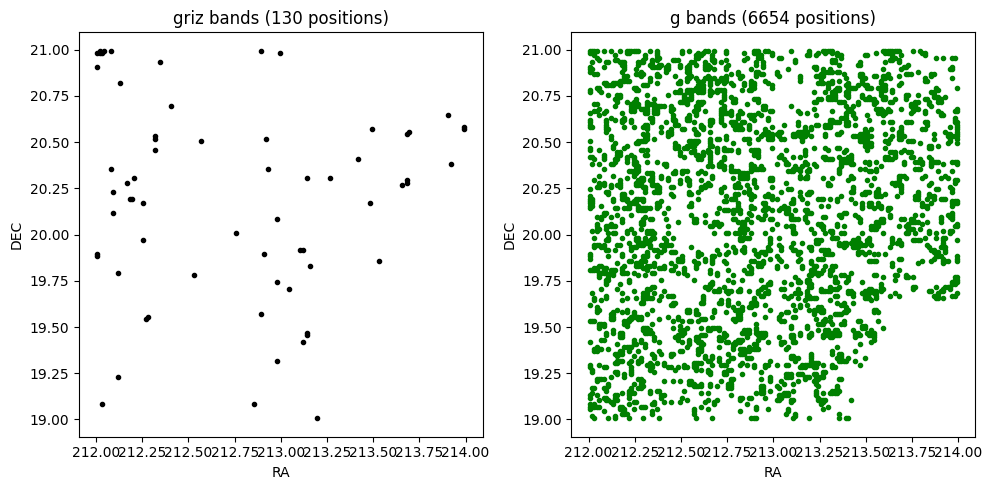

In [6]:
# difference between griz and g band in the same area
print(f"Positions found (griz): {positions_allbands.size}")
print(f"Positions found (g): {positions_gband.size}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(positions_allbands['ra'], positions_allbands['dec'], 'k.')
ax1.set(title=f"griz bands ({positions_allbands.size} positions)", xlabel="RA", ylabel="DEC")
ax2.plot(positions_gband['ra'], positions_gband['dec'], 'g.')
ax2.set(title=f"g bands ({positions_gband.size} positions)", xlabel="RA", ylabel="DEC")
plt.tight_layout()
plt.show()

In [7]:
# generate "whole sky"
# positions_allsky_gband = catalog_g_band.all_sky(query_dist=2.0)

# generate sections of the whole sky
positions_allsky_gband = catalog_g_band.all_sky(query_dist=2.0, min_ra=212, max_ra=216, min_dec=16, max_dec=20)

================= WHOLE SKY =================
===== From 212,16 to 216,20 in 2.0^2 squares ======
====== WHOLE SKY: Looping through sky coordinates... =====
====== 2.0-degree square starting from RA,DEC = 212.0, 16.0 ======
> Creating sky catalog from one 2.0-degree square starting from (212.0, 16.0) to (214.0, 18.0)
>> Querying the tractor catalog for stars from RA/DEC(212.0, 16.0) to (214.0, 18.0)...
Elapsed time: 12.8964 seconds
>> Looping through sky coordinates...
>>> Generating sky catalog for square RA,DEC (212.0, 16.0) to (213.0, 17.0)...
>>>> Combining mask and queried stars...
Elapsed time: 0.0002 seconds
Elapsed time: 0.3026 seconds
>>>> Calculating pixel values for stars....
Elapsed time: 0.0060 seconds
>>>> Creating segmentation map...
Elapsed time: 5.2166 seconds
>>>> Finding dark regions in segmentation map...
Elapsed time: 0.5291 seconds
>>>> Converting dark regions to coordinates...
Elapsed time: 0.0009 seconds
>>>> Finding maximum extent of stars beyond the degree-squ

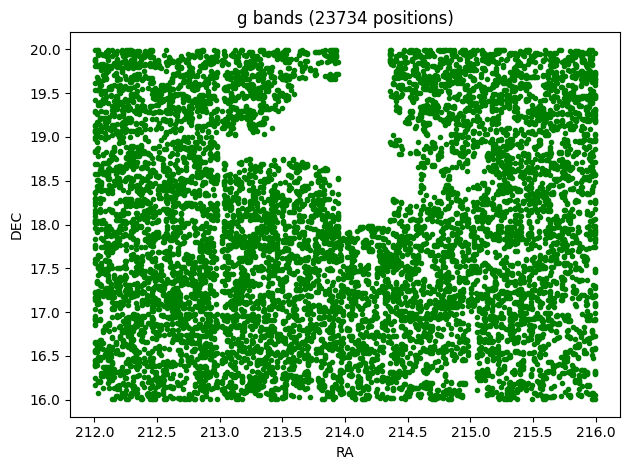

In [9]:
fig, ax = plt.subplots()
ax.plot(positions_allsky_gband['ra'], positions_allsky_gband['dec'], 'g.')
ax.set(title=f"g bands ({positions_allsky_gband.size} positions)", xlabel="RA", ylabel="DEC")
plt.tight_layout()
plt.show()

Whole sky generation avoids the Galactic plane (within |b| > 18) and the LMC / SMC, and simply does not run the dark sky finding algorithms on the degree-level squares that intersect with those boundaries.